<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data.info()
data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


### Вывод
В таблице 22 столбца и 23699 записи.Есть пропущенные значения и некорректные типы данных. 

## Предобработка данных

In [17]:
# Приводим в целочисленный тип стоимость квартиры
data['last_price'] = data['last_price'].astype(int)
# Приводим к типу даты дату публикации
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
# Приводим в целочисленный тип количество балконов. Заменяем пропущенные значения на 0
data['balcony'] = data['balcony'].fillna(value=0).astype(int)
# Приводим в целочисленный тип количество парков. Заменяем пропущенные значения на 0
data['parks_around3000'] = data['parks_around3000'].fillna(value=0).astype(int)
# Приводим в целочисленный тип количество прудов. Заменяем пропущенные значения на 0
data['ponds_around3000'] = data['ponds_around3000'].fillna(value=0).astype(int)
# Удаляем записи, где отсутствует локация и этажность
data.dropna(subset=['locality_name'], inplace=True)
data.dropna(subset=['floors_total'], inplace=True)
# Приводим этажность к целочисленному типу
data['floors_total'] = data['floors_total'].astype(int)
# Заменяем оставшиеся пустые значения высоты потолков на медианное значение по всему датасету
data['ceiling_height'] = data.groupby(['locality_name', 'floors_total'])['ceiling_height'].apply(lambda x: x.fillna(x.median()))
data['ceiling_height'].fillna(data['ceiling_height'].median(), inplace=True)
# Заменяем пустые значения жилой площади и площади кухни
living_ratio = data['living_area'].mean() / data['total_area'].mean()
kitchen_ratio = data['kitchen_area'].mean() / data['total_area'].mean()
data['living_area'].fillna(living_ratio * data['total_area'])
data['kitchen_area'].fillna(kitchen_ratio * data['total_area'])
data.isnull().sum()# Проверяем количество пропущенных значений



last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5367
cityCenters_nearest      5357
parks_around3000            0
parks_nearest           14324
ponds_around3000            0
ponds_nearest           13241
days_exposition             0
sm_price                    0
weekday                     0
month                       0
year                        0
area_ratio                  0
kitchen_ratio               0
floor_type                  0
center_km                   0
dtype: int64

Приводим в целочисленный тип стоимость квартиры.
Приводим к типу даты дату публикации.
Приводим в целочисленный тип количество балконов. Заменяем пропущенные значения на 0.Количество балконов не может быть float.
Приводим в целочисленный тип количество парков. Заменяем пропущенные значения на 0.парков.Количество парков не может быть float.
Приводим в целочисленный тип количество прудов. Заменяем пропущенные значения на 0.Количество прудов не может быть float.
Удаляем записи, где отсутствует локация и этажность.
Приводим этажность к целочисленному типу.
Заменяем оставшиеся пустые значения высоты потолков на медианное значение по всему датасету.
Заменяем пустые значения жилой площади и площади кухни на средние по датасету.




```python

columns = [col1, col2, col3]

for i in columns:
    df[i] = df[i].fillna(0)

```

## Расчёты и добавление результатов в таблицу

In [4]:
# Добавляем столбец со стоимостью квадратного метра (sm_price) и приводим его в целочисленный тип
data['sm_price'] = data['last_price'] / data['total_area']
data['sm_price'] = data['sm_price'].astype(int)

# Добавляем столбцы дня недели, месяца и года
data['weekday'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year
# Добавляем столбец с отношением жилой площади к общей (area_ratio), переводим в % и приводим его в целочисленный тип
data['area_ratio'] = data['living_area'] / data['total_area'] * 100
data['area_ratio'] = data['area_ratio'].fillna(value=0).astype(int)
# Добавляем столбец с отношением площади кухни к общей (kitchen_ratio), переводим в % и приводим его в целочисленный тип
data['kitchen_ratio'] = data['kitchen_area'] / data['total_area'] * 100
data['kitchen_ratio'] = data['kitchen_ratio'].fillna(value=0).astype(int)
# Создаём функцию для заполнения нового столбца с типом этажа
def floor_group(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
data['floor_type'] = data.apply(floor_group, axis=1)
data.drop(['is_apartment'], axis='columns', inplace=True)#в процессе работы над проектом мы не будем использовать 
                                                         #столбец is_apartment.Его можно удалитьть
data.drop(['total_images'], axis='columns', inplace=True)# Также можно избавиться от столбцов 
data.drop(['studio'], axis='columns', inplace=True)#total_images, studio и open_plan  
data.drop(['open_plan'], axis='columns', inplace=True)#в дальнейшей работе они нам не понадобятся.
data.head(10)

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,ponds_around3000,ponds_nearest,days_exposition,sm_price,weekday,month,year,area_ratio,kitchen_ratio,floor_type
0,13000000,108.00,2019-03-07,3,2.700,16,51.000000,8,25.000000,0,...,2,755.0,NaN,120370,3,3,2019,47,23,другой
1,3350000,40.40,2018-12-04,1,2.650,11,18.600000,1,11.000000,2,...,0,NaN,81.0,82920,1,12,2018,46,27,первый
2,5196000,56.00,2015-08-20,2,2.600,5,34.300000,4,8.300000,0,...,2,574.0,558.0,92785,3,8,2015,61,14,другой
3,64900000,159.00,2015-07-24,3,2.600,14,90.816648,9,27.836861,0,...,3,234.0,424.0,408176,4,7,2015,57,17,другой
4,10000000,100.00,2018-06-19,2,3.030,14,32.000000,13,41.000000,0,...,1,48.0,121.0,100000,1,6,2018,32,41,другой
5,2890000,30.40,2018-09-10,1,2.625,12,14.400000,5,9.100000,0,...,0,NaN,55.0,95065,0,9,2018,47,29,другой
6,3700000,37.30,2017-11-02,1,2.600,26,10.600000,6,14.400000,1,...,0,NaN,155.0,99195,3,11,2017,28,38,другой
7,7915000,71.60,2019-04-18,2,2.750,24,40.896050,22,18.900000,2,...,0,NaN,NaN,110544,3,4,2019,57,26,другой
8,2900000,33.16,2018-05-23,1,2.650,27,15.430000,26,8.810000,0,...,0,NaN,189.0,87454,2,5,2018,46,26,другой
9,5400000,61.00,2017-02-26,3,2.500,9,43.600000,7,6.500000,2,...,0,NaN,289.0,88524,6,2,2017,71,10,другой


## Исследовательский анализ данных

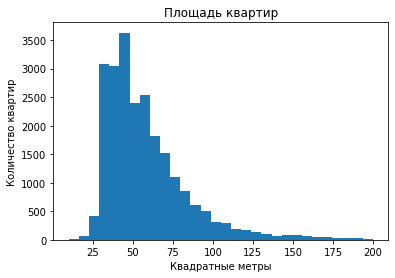

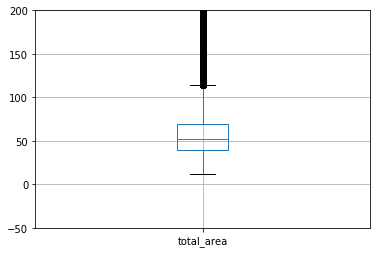

In [5]:
plt.hist(data['total_area'], bins=30, range=(10,200))#Посмотрим, как выглядят диаграммы размаха для изученных данных 
                               #и избавимся от выбросов
plt.title('Площадь квартир')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()
data.boxplot('total_area')
plt.ylim(-50, 200)
plt.show() #Разброс нормальных значений начинается около 15 кв.м изаканчивается у 120 кв.м. 
data = data.query('total_area>=15 and total_area<=120')#Избавимся от всех выбивающихся значений. 




ВЫВОД:Гистограмма по столбцу total_area выглядит правдоподобно - квартир площадью менее 20 кв.м 
                                 почти нет, большая доля квартир имеет площадь 30-60 кв.м, также видим 
                                 мощный пик у значения 45 кв.м. 
                                 После значения 100 кв.м число квартир стремительно убывает

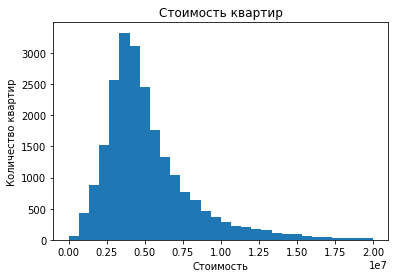

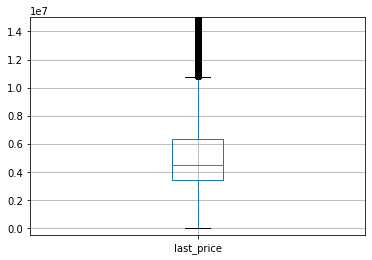

In [6]:
plt.hist(data['last_price'], bins=30, range=(0,20000000))
plt.title('Стоимость квартир')
plt.xlabel('Стоимость')
plt.ylabel('Количество квартир')
plt.show()#цена..
plt.show()    
data.boxplot('last_price')#Нормальные значения находятся в интервале от нуля до 11 млн. Оставим только их.
plt.ylim(-500000, 15000000)
plt.show()
data = data.query('last_price>10000 and last_price<=11000000')



ВЫВОД:График принимает ожидаемый вид. Можем отметить пик у значения цены 3 млн. Квартир,
дороже 10 млн, гораздо меньше.В основном стоимость квартир - порядка 5 миллионов. Больше 20 миллионов вариантов мало. 

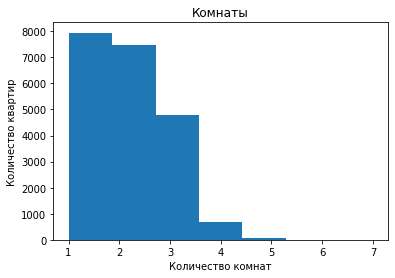

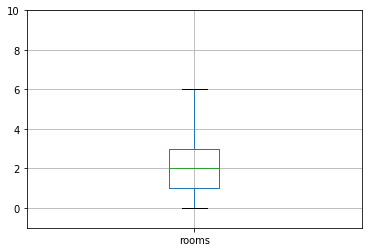

In [73]:
plt.hist(data['rooms'], bins=7, range=(1,7))
plt.title('Комнаты')
plt.xlabel('Количество комнат')
plt.ylabel('Количество квартир')#Количество комнат. 
plt.show()    
data.boxplot('rooms')
plt.ylim(-1, 10)
plt.show() 

data = data.query('rooms>=0 and rooms <7')#Нормальные значения - от 0 до 6, оставим только их.


ВЫВОД:В основном квартиры состоят из 1, 2 и 3 комнат. Есть небольшая доля 4 и 5-комнатных квартир. 

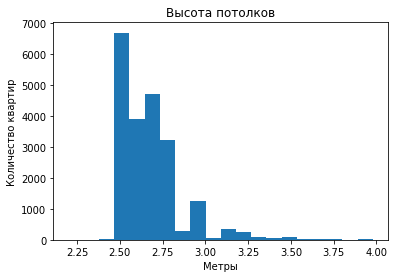

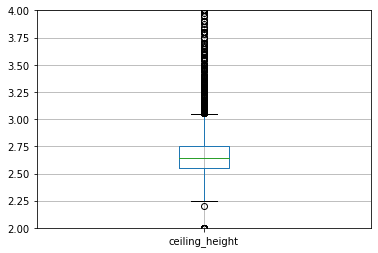

In [7]:
plt.hist(data.query('(ceiling_height > 2) & (ceiling_height < 4)')['ceiling_height'], bins=20)
plt.title('Высота потолков')#высота потолков.
plt.xlabel('Метры')
plt.ylabel('Количество квартир')
plt.show()
data.boxplot('ceiling_height')
plt.ylim(2, 4)
data = data.query('ceiling_height>=2.2 and ceiling_height <=3')#Избавимся от всех значений, меньших 2.2 и больших 3.
plt.show()



ВЫВОД:У большей части квартир высота потолков 2.5-2.7 м.

Время продажи (медиана): 89 

Время продажи (среднее): 169 



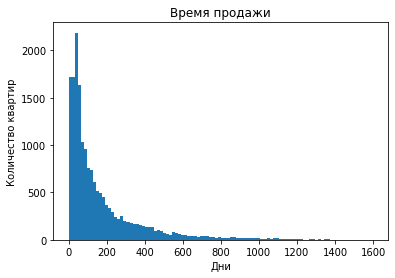

count    17753.000000
mean       168.905537
std        206.990721
min          1.000000
25%         43.000000
50%         89.000000
75%        213.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [8]:
# Устанавливаем маркер 9999 для пропусков в сроке продажи и приводим к целочисленному типу
data['days_exposition'].fillna(9999, inplace=True)
data['days_exposition'] = data['days_exposition'].astype(int)
data['days_exposition'] = data['days_exposition'].astype(int)


# Отбрасываем маркеры пустых значений
print('Время продажи (медиана):', round(data.query('days_exposition != 9999')['days_exposition'].median()),'\n')
print('Время продажи (среднее):', round(data.query('days_exposition != 9999')['days_exposition'].mean()),'\n')

plt.hist(data.query('days_exposition != 9999')['days_exposition'], bins=100, range=(0,1600))# Гистограма времени продажи
plt.title('Время продажи')
plt.xlabel('Дни')
plt.ylabel('Количество квартир')
plt.show()

# Изучаем значения срока продажи
data.query('days_exposition != 9999')['days_exposition'].describe()



ВЫВОД:Медианное время продажи - 89 дней. Среднее время продажи - 169 дней.
В основном квартиры продаются за срок в 100 дней. Есть большое число квартир, проданных всего за несколько дней после публикации. А также есть варианты, которые продавались несколько десятков месяцев.
Быстрой продажей можно назвать срок в 43 дня и меньше. Долгой продажей - 213 дней  и дольше.

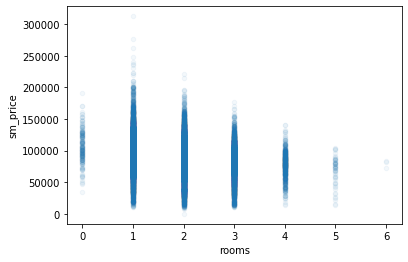

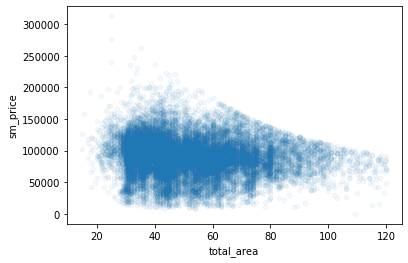

In [9]:
# Изучим, какие факторы больше всего влияют на стоимость квартиры. Зависит ли цена квадратного метра от числа комнат и удалённости от центра? Также изучим зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом.
def draw_plot(data, y, x):
    data.plot(y=y, x=x, kind='scatter', alpha=0.05)
index = data.index 
price_rooms_area_corr = data.pivot_table(index=index, values=['total_area','rooms', 'sm_price'], aggfunc='mean')
price_rooms_area_corr.corr()
draw_plot(price_rooms_area_corr, 'sm_price', 'rooms')
draw_plot(price_rooms_area_corr, 'sm_price', 'total_area')





ВЫВОД:Видим, что стоимость средне зависит от общей площади, и в меньшей степени от количества комнат. Как наблюдение - больше всего в таблице зависимость между количеством комнат и площадью, что достаточно логично.
Тем не менее, с увеличением количества комнат цена за кв.м падает. А если рассматриваем общую площадь, то стоимость за квадратный метр падает с каждым метром при увеличении площади после 60 кв.м
#Зависимость от удаления от центра

In [10]:
# Зависимость цены от удалённости от центра
distance_from_center = data.query('cityCenters_nearest != -1')
distance_from_center['sm_price'].corr(distance_from_center['cityCenters_nearest'])

-0.3942752140793194

ВЫВОД:Коэффициент корреляции отрицательный. Это значит, что увеличение расстояния от центра связано с уменьшением стоимости квартиры, что подтверждается на графике.

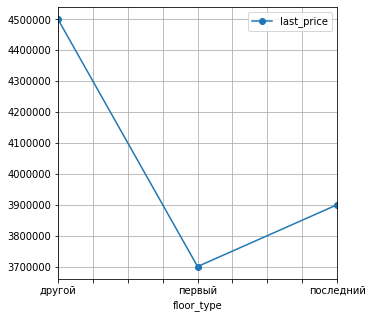

In [11]:
#Посмотрим на взаимосвязь стоимости квартиры и этажа, на котором она расположена.
# Зависимость цены от этажа

(
    data.pivot_table(index='floor_type', values='last_price', aggfunc='median')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()


             month  sm_price   weekday      year
month     1.000000 -0.002316  0.009718 -0.268930
sm_price -0.002316  1.000000 -0.007478  0.076405
weekday   0.009718 -0.007478  1.000000 -0.001840
year     -0.268930  0.076405 -0.001840  1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f823ec53450>,
      dtype=object)

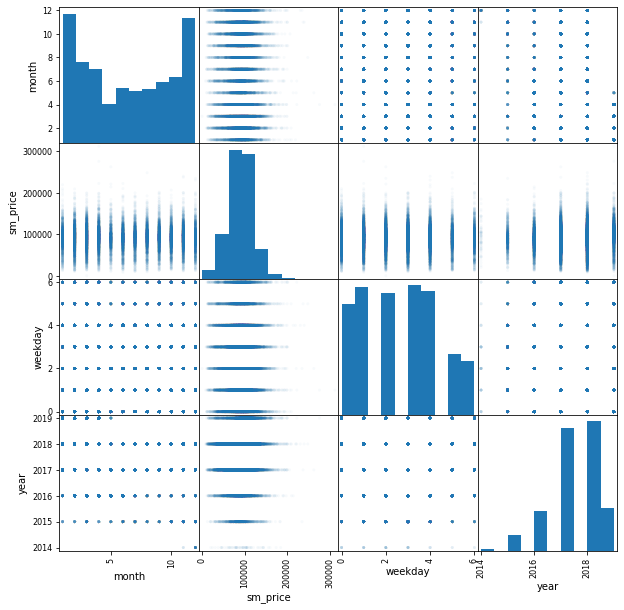

In [59]:
#Посмотрим на взаимосвязь стоимости и времени размещения объявления: дня недели, месяца и года.
exposition_date = data.pivot_table(index=index, values=['weekday', 'month', 'year', 'sm_price'], aggfunc='mean')
print(exposition_date.corr())
pd.plotting.scatter_matrix(exposition_date, figsize=(10, 10), alpha=0.03)


ВЫВОД:При взгляде на коэффициент корреляции год, день недели и месяц размещения практически не связаны со стоимостью квартир. Однако, связь здесь может быть нелинейной, поэтому взглянем на графики зависимости.
Дешевле всего квадратный метр стоит в объявлениях, размещенных на выходных.
Квартиры, выставленные на продажу зимой, в декабре и январе, дороже всего. Дешевле всего - в мае.
Можем отметить тенденцию роста цен от года к году, однако дороже всего квартиры стоили в 2018.

                   count  mean_sm_price
locality_name                          
Санкт-Петербург    12494  104763.150392
посёлок Мурино       518   85645.445946
посёлок Шушары       437   78516.693364
Всеволожск           389   67215.136247
посёлок Парголово    326   90331.840491
Колпино              325   75260.267692
Пушкин               321  100071.467290
деревня Кудрово      298   92409.265101
Гатчина              297   68558.178451
Выборг               202   57657.524752


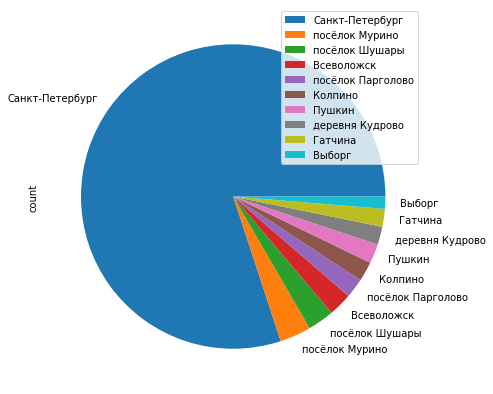

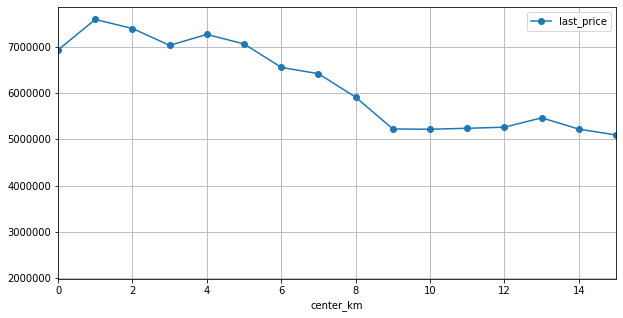

In [12]:
#Выберем 10 населённых пунктов с наибольшим числом объявлений. Посчитем среднюю цену квадратного метра в этих населённых пунктах. Выделим населённые пункты с самой высокой и низкой стоимостью жилья.
# Сравниваем среднюю стоимость квадратного метра в топ-10 городов по числу объявлений
locality_sm_price = data.loc[:, ['locality_name', 'sm_price']]
locality_sm_price = locality_sm_price.pivot_table(index='locality_name', values='sm_price', aggfunc=['count', 'mean'])
locality_sm_price.columns = ['count', 'mean_sm_price']
top10_locality = locality_sm_price.sort_values(by='count', ascending=False).head(10)
top10_locality.plot(y='count', kind='pie', figsize=(7, 7))
print(top10_locality)



# Добавляем столбец с расстоянием до центра в км, округляем до целого
data['center_km'] = data['cityCenters_nearest'] / 1000
data['center_km'] = data['center_km'].fillna(value=0).astype(int)
# Выбираем Санкт-Петербург, смотрим на график, где указана средняя стоимость для каждого км
(
    data.query('locality_name == "Санкт-Петербург"')
    .pivot_table(index='center_km', values='last_price')
    .plot(grid=True, style='o-', xlim=(0,15), figsize=(10, 5))
)
plt.show()

spb_center = data.query('(locality_name == "Санкт-Петербург") & (center_km <= 7)')



ВЫВОД:Дороже всего кадратный метр стоит в Санкт-Петербурге и в Пушкине.Из топ-10 наименьшая стоимость в Гатчине и Всеволожске, из которых далеко ехать до Санкт-Петербурга, а также неболшой по численности населения Выборг, расположенный на большом расстоянии от Санкт-Петербурга.
Центральная зона - это 7 км и меньше. Дальше 7 км средняя цена на квартиры резко снижается.

Площадь (медиана): 49 

Площадь в центре (медиана): 59 

Площадь (среднее): 53 

Площадь в центре (среднее): 61 



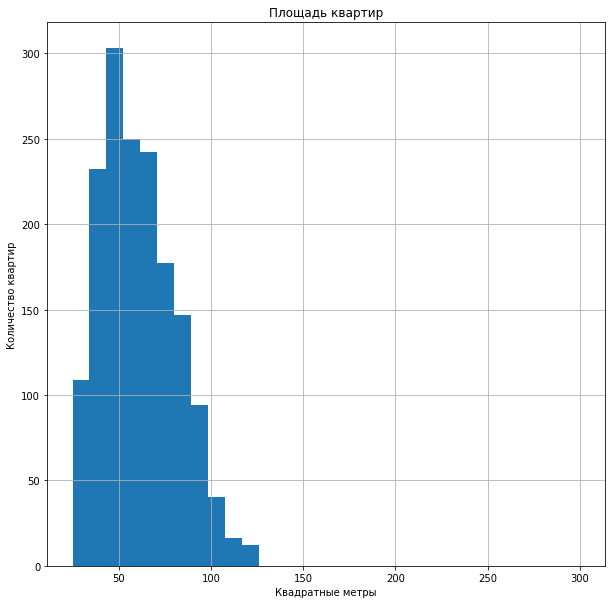

Число вариантов с ценой больше 20 млн: 0


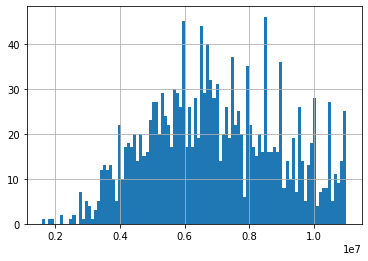

In [14]:
# Изучаем площадь
print('Площадь (медиана):', round(data.query('locality_name == "Санкт-Петербург"')['total_area'].median()),'\n')
print('Площадь в центре (медиана):', round(spb_center['total_area'].median()),'\n')
print('Площадь (среднее):', round(data.query('locality_name == "Санкт-Петербург"')['total_area'].mean()),'\n')
print('Площадь в центре (среднее):', round(spb_center['total_area'].mean()),'\n')
spb_center['total_area'].hist(bins=30, range=(25,300), figsize=(10,10))
plt.title('Площадь квартир')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()
# Работаем со стоимостью
spb_center['last_price'].hist(bins=100)
print('Число вариантов с ценой больше 20 млн:', spb_center.query('last_price > 20000000')['last_price'].count())
plt.show()



In [81]:


# Изучаем число комнат
spb_rooms = data.query('(locality_name == "Санкт-Петербург") & (rooms > 0)').pivot_table(index='rooms', values='floor', aggfunc='count')
spb_rooms.columns = ['count']
spb_rooms['rooms_ratio'] = spb_rooms['count'] / spb_rooms['count'].sum() * 100
spb_rooms_center = data.query('(locality_name == "Санкт-Петербург") & (center_km <= 7)  & (rooms > 0)').pivot_table(index='rooms', values='floor', aggfunc='count')
spb_rooms_center.columns = ['center_count']
spb_rooms_center['center_rooms_ratio'] = spb_rooms_center['center_count'] / spb_rooms_center['center_count'].sum() * 100
rooms_alldata = pd.merge(spb_rooms, spb_rooms_center, 'left', on = 'rooms')
rooms_alldata['center_cap'] = round(rooms_alldata['center_count'] / rooms_alldata['count'] * 100)
display(rooms_alldata)



,count,rooms_ratio,center_count,center_rooms_ratio,center_cap
rooms,,,,,
1,4721,38.091012,457,28.071253,10.0
2,4340,35.016944,614,37.714988,14.0
3,2871,23.164434,435,26.719902,15.0
4,423,3.412942,105,6.449631,25.0
5,36,0.290463,16,0.982801,44.0
6,3,0.024205,1,0.061425,33.0


Высота потолков (медиана): 2.65 

Высота потолков в центре (медиана): 2.75 

Высота потолков (среднее): 2.661294621418281 

Высота потолков в центре (среднее): 2.764301403294692 



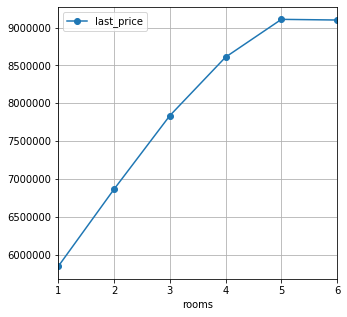

Корреляция цены и числа комнат: 

            last_price     rooms
last_price    1.000000  0.246389
rooms         0.246389  1.000000 



In [65]:
# Изучаем высоту потолков
print('Высота потолков (медиана):', data.query('locality_name == "Санкт-Петербург"')['ceiling_height'].median(),'\n')
print('Высота потолков в центре (медиана):', spb_center['ceiling_height'].median(),'\n')
print('Высота потолков (среднее):', data.query('locality_name == "Санкт-Петербург"')['ceiling_height'].mean(),'\n')
print('Высота потолков в центре (среднее):', spb_center['ceiling_height'].mean(),'\n')
(
    spb_center.query('(rooms > 0) & (rooms < 7)').pivot_table(index='rooms', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()
print('Корреляция цены и числа комнат:','\n')
print(spb_center.query('(rooms > 0) & (rooms < 7)').pivot_table(index='floor', values=['rooms', 'last_price']).corr(),'\n')
# Зависимость цены от числа комнат


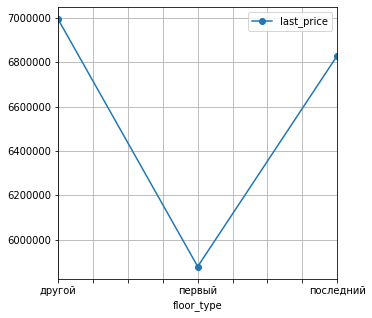

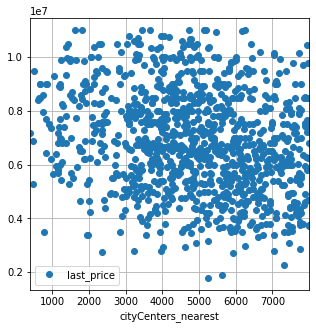

Корреляция цены и удалённости от центра: 

                     cityCenters_nearest  last_price
cityCenters_nearest             1.000000    0.314025
last_price                      0.314025    1.000000 



In [82]:


# Зависимость цены от этажа
(
    spb_center.pivot_table(index='floor_type', values='last_price', aggfunc='median')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()

# Зависимость цены от удалённости от центра
(
    spb_center.pivot_table(index='cityCenters_nearest', values='last_price', aggfunc='median')
    .plot(grid=True, style='o', figsize=(5, 5))
)
plt.show()
print('Корреляция цены и удалённости от центра:','\n')
print(spb_center.pivot_table(index='floor', values=['cityCenters_nearest', 'last_price']).corr(),'\n')


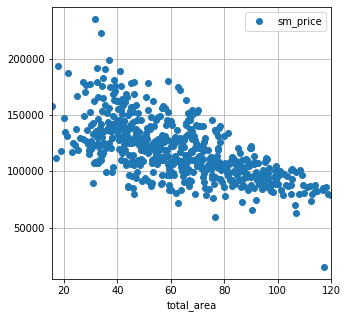

Корреляция цены за квадрат и площади: 

            sm_price  total_area
sm_price    1.000000   -0.575883
total_area -0.575883    1.000000 



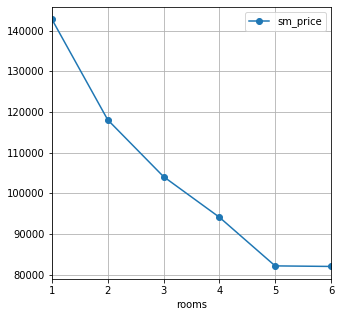

Корреляция цены за квадрат и числа комнат: 

             rooms  sm_price
rooms     1.000000 -0.730687
sm_price -0.730687  1.000000 



In [83]:
# Зависимость цены за квадрат от площади
(
    spb_center.pivot_table(index='total_area', values='sm_price')
    .plot(grid=True, style='o', figsize=(5, 5))
)
plt.show()
print('Корреляция цены за квадрат и площади:','\n')
print(spb_center.pivot_table(index='floor', values=['total_area', 'sm_price']).corr(),'\n')

# Зависимость цены за квадрат от числа комнат
(
    spb_center.query('rooms > 0').pivot_table(index='rooms', values='sm_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()
print('Корреляция цены за квадрат и числа комнат:','\n')
print(spb_center.query('rooms > 0').pivot_table(index='floor', values=['rooms', 'sm_price']).corr(),'\n')


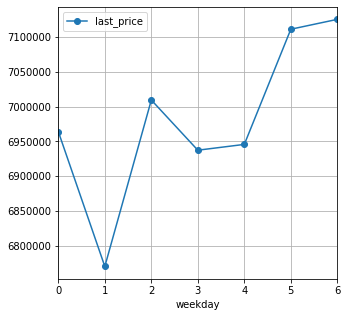

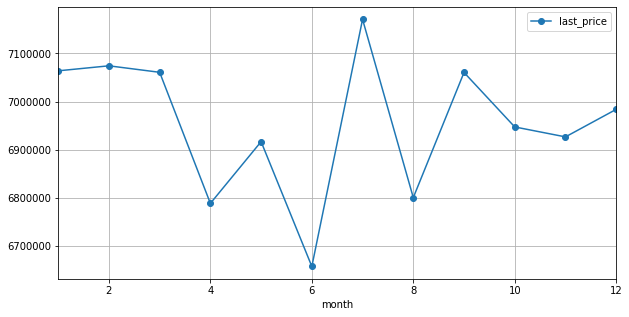

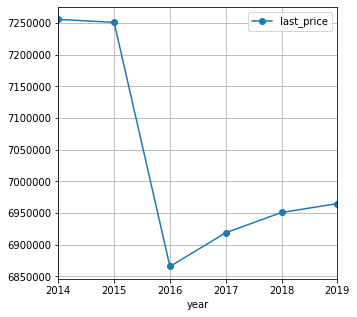

In [67]:
# Зависимость от дня размещения
(
    spb_center.pivot_table(index='weekday', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()
# Зависимость от месяца размещения
(
    spb_center.pivot_table(index='month', values='last_price')
    .plot(grid=True, style='o-', xlim=(1,12), figsize=(10, 5))
)
plt.show()
# Зависимость от года размещения
(
    spb_center.pivot_table(index='year', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()

ВЫВОД:Площадь квартир в центре значительно больше, чем в целом по городу - в среднем на 9-10 метров. Также в центре находится большое число квартир с огромной площадью (100 квадратных метров и более).

Комнаты. В центре  ниже доля однокомнатных квартир(28%) , чем в среднем по городу(38%) . 25% четырёхкомнатных квартир находится в центре города , их доля выше, чем в среднем по городу (3 %). Большинство квартир с 5 комнатами и более находятся в центре города.

Высота потолков в центре выше в среднем на 10 сантиметров.

Зависимость цены квартиры от числа комнат в центре такая же, как и в целом по городу. 

В центре верхний этаж стоит практически столько же, сколько и другие этажи, кроме первого.

В центре есть очень дорогие однокомнатные квартиры.

В центральной зоне почти нет зависимости от удалённости от центра города. Стоимость даже немного повышается при удалении от центра - вероятно, это связано с расположением точки, которая является формальным центром города.

В центре значительно выше стоимость квартир, опубликованных в субботу и в декабре (вероятно, перед Новым годом люди хотят сделать подарок)

Стоимость квартир в центре значительно выросла в 2015 году и снизилась только в 2017 году. 

## Общий вывод

Срок продажи квартиры
Чаще всего квартиру продают за 89 дней. Если меньше 43 дней, то это быстро, если дольше 213 дней - это долго.
Есть большое число квартир, проданных всего за несколько дней после публикации.
Также есть варианты, которые продавались несколько десятков месяцев.

Факторы, влияющие на стоимость
На стоимость больше влияет площадь квартиры, нежели число комнат. Т.е. могут быть дорогие квартиры с малым числом комнат, но где комнаты просторные.
Первый этаж значительно дешевле остальных вариантов. Также стоимость квартиры на последнем этаже ниже, чем на остальных, кроме первого.
Отдаление от центра города связано с уменьшением стоимости недвижимости, при этом центральной цасти города это не касается - здесь квартиры одинаково дорогие

Стоимость квадратного метра в топ-10 населённых пунктов
Дороже всего квадратный метр в Санкт-Петербурге - 104763
Дешевле всего квадратный метр в Выборге - 57657

Факторы, влияющие на стоимость в центре Санкт-Петербурга
В центре города практически нет разницы, насколько квартира удалена от условного центра города.
В центре города последний этаж практически не влияет на стоимость квартиры, в отличие от остального города.
В центре есть очень дорогие однокомнатные квартиры.
Обнаружилась следующая cвязь между временем размещения объявления и стоимостью квартиры: квартиры, выставленные на продажу в декабре и январе дороже, чем в другие месяцы; квартиры, выставленные на продажу на выходных, дешевле, чем в другие дни недели; квартиры были дороже всего в 2017 и 2018 году для центра С-П и в 2018 для всех остальных районов и населенных пунктов.
